In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas_datareader import data as pdr
import datetime as dt
import yfinance as yf

#Get the data from Yahoo Finance

def get_data(ticker, start, end):
    stocks = yf.download(ticker, start, end)
    stocks = stocks['Adj Close']
    returns = stocks.pct_change()
    meanRets = returns.mean()
    covMatrix = returns.cov()
    return meanRets, covMatrix

tickers = ['AAPL', 'MSFT', 'META', 'ADBE', 'CRM', 'MRNA', 'DG']
end = dt.datetime.now()
start = end - dt.timedelta(days=300)
meanRets, covMatrix = get_data(tickers, start, end)


[*********************100%***********************]  7 of 7 completed


In [12]:
#weights of the portfolio. Adds up to 1

weights = np.random.random(len(meanRets))
weights /= np.sum(weights)
weights

array([0.28260309, 0.00335509, 0.17253032, 0.1475969 , 0.23858391,
       0.13020178, 0.02512892])

In [13]:
#Monte Carlo
#Define number of simulations
mc_sims = 10000
T = 100 #Number of days simulated

MeanMatrix = np.full(shape=(T, len(weights)), fill_value=meanRets)
MeanMatrix = MeanMatrix.T

In [14]:
#Simulation matrix (Number of days simulated by Numbers of simulations)
portfolio_sims = np.full(shape=(T, mc_sims), fill_value=0.0)
#Initial size of portfolio
PortfolioSize = 10000 

for m in range(0, mc_sims):
    Z = np.random.normal(size=(T, len(weights)))
    L = np.linalg.cholesky(covMatrix)
    DailyChange = MeanMatrix + np.inner(L, Z)
    portfolio_sims[:,m] = np.cumprod(np.inner(weights, DailyChange.T)+1)*PortfolioSize

Text(0.5, 1.0, 'Monte Carlo simulation of portfolio of stocks')

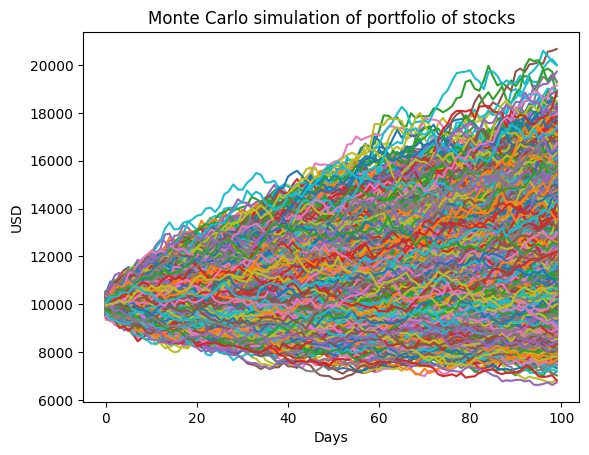

In [15]:
plt.plot(portfolio_sims)
plt.ylabel('USD')
plt.xlabel('Days')
plt.title('Monte Carlo simulation of portfolio of stocks')